# What is the most optimal skill to learn for Data Analysts?

### Methodology
1. Find percent of postings with skill
2. Visualize mdeian salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
df_DA = df[(df['job_title_short'] == 'Data Analyst')]
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [4]:
df_DA = df_DA.dropna(subset='salary_year_avg')

df_DA_exploded = df_DA.explode('job_skills')

df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,looker,"{'analyst_tools': ['looker'], 'programming': [..."


In [5]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA)

df_DA_skills['skill_pct'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_pct = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_pct'] > skill_pct]

df_DA_skills_high_demand

,skill_count,median_salary,skill_pct
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


### Plotting with scatter plot

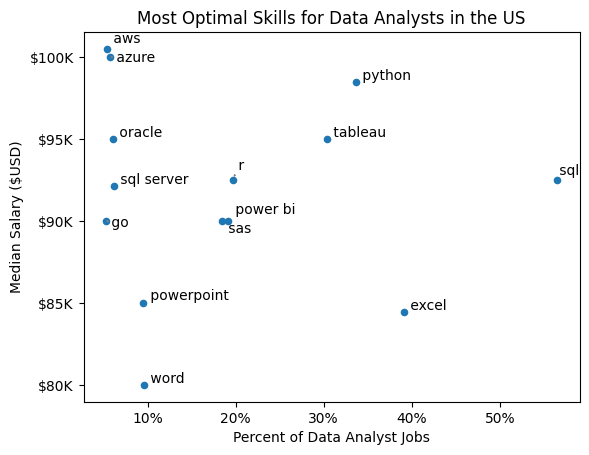

In [6]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_pct', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_pct'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [7]:
# Copy data
df_tech = df['job_type_skills'].copy()

# Drop duplicates
df_tech = df_tech.drop_duplicates()

# Drop null values
df_tech = df_tech.dropna()

# Combine all dictionaries into 1
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row) # Convert string to dictionary
    for key, value in row_dict.items():
        if key in tech_dict:         # if key already exists in technology_dict, add value to existing value
            tech_dict[key] += value
        else:                        # if key does not exist in technology_dict, add key and value
            tech_dict[key] = value

# Remove duplicates by converting into a set then convert it back to a list
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict

{'analyst_tools': ['qlik',
  'tableau',
  'word',
  'spreadsheet',
  'powerpoint',
  'splunk',
  'sharepoint',
  'datarobot',
  'sas',
  'dax',
  'nuix',
  'alteryx',
  'spss',
  'power bi',
  'microstrategy',
  'esquisse',
  'ms access',
  'visio',
  'ssis',
  'ssrs',
  'sheets',
  'cognos',
  'excel',
  'powerbi',
  'msaccess',
  'outlook',
  'looker',
  'sap'],
 'programming': ['crystal',
  'scala',
  'shell',
  'c',
  'perl',
  'golang',
  'pascal',
  'kotlin',
  'solidity',
  'javascript',
  'sql',
  'no-sql',
  'groovy',
  'sass',
  'erlang',
  'apl',
  'html',
  'python',
  'dart',
  'php',
  'cobol',
  'sas',
  'c#',
  'mongodb',
  'swift',
  'assembly',
  'elixir',
  'vb.net',
  'rust',
  'fortran',
  'objective-c',
  'clojure',
  'c++',
  'visualbasic',
  'bash',
  'vba',
  'css',
  'r',
  'visual basic',
  'julia',
  'delphi',
  'nosql',
  'ruby',
  't-sql',
  'go',
  'ocaml',
  'java',
  'lua',
  'mongo',
  'lisp',
  'typescript',
  'f#',
  'haskell',
  'matlab',
  'powersh

In [8]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology','skills'])

df_tech = df_tech.explode('skills')

df_tech

,technology,skills
0,analyst_tools,qlik
0,analyst_tools,tableau
0,analyst_tools,word
0,analyst_tools,spreadsheet
0,analyst_tools,powerpoint
...,...,...
9,sync,slack
9,sync,rocketchat
9,sync,google chat
9,sync,mattermost


In [9]:
df_DA_plot = df_DA_skills_high_demand.merge(df_tech, left_on='job_skills', right_on='skills', how='left')
df_DA_plot

,skill_count,median_salary,skill_pct,technology,skills
0,3079,92500.0,56.485049,programming,sql
1,2135,84479.0,39.167125,analyst_tools,excel
2,1838,98500.0,33.718584,programming,python
3,1657,95000.0,30.398092,analyst_tools,tableau
4,1073,92527.5,19.684462,programming,r
5,1042,90000.0,19.115759,analyst_tools,power bi
6,1006,90000.0,18.455329,analyst_tools,sas
7,1006,90000.0,18.455329,programming,sas
8,523,80000.0,9.594570,analyst_tools,word
9,518,85000.0,9.502844,analyst_tools,powerpoint


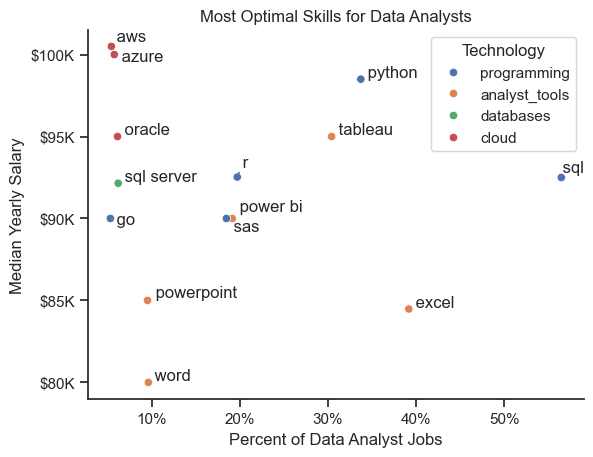

In [11]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Plotting and setting theme
sns.scatterplot(
    data=df_DA_plot,
    x='skill_pct',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_pct'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Labeling and formatting labels
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts')
plt.legend(title='Technology')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()